In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# The data

In [3]:
metadata_df = pd.read_csv("train_metadata.csv", index_col="sample")
samples = len(metadata_df) #6096

# Male vs Female

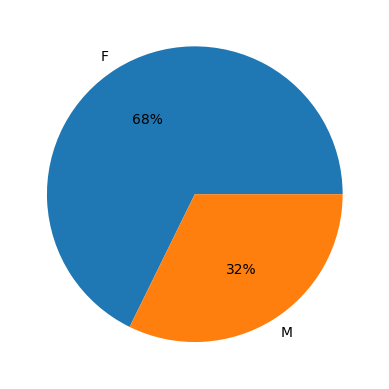

In [4]:
sex_cnt = np.array(metadata_df[["month", "sex"]].groupby("sex").count()).reshape(-1)

plt.pie(sex_cnt/ np.sum(sex_cnt), labels=["F", "M"], autopct='%.0f%%')
plt.show()

<Axes: ylabel='Percent'>

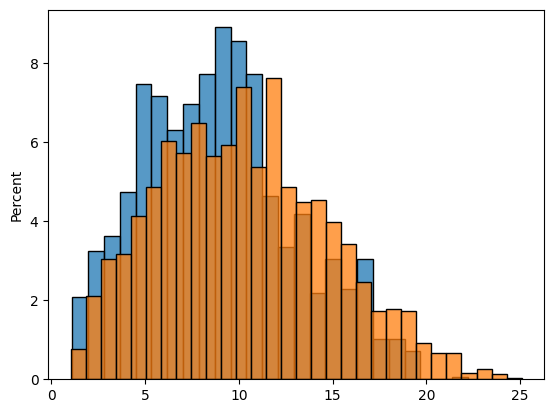

In [5]:
male = metadata_df[metadata_df["sex"] == 'M']
female = metadata_df[metadata_df["sex"] == 'F']

male_ages = male["age"].values
female_ages = female["age"].values

sns.histplot(male_ages, stat="percent")
sns.histplot(female_ages, stat="percent")



# Month distribution

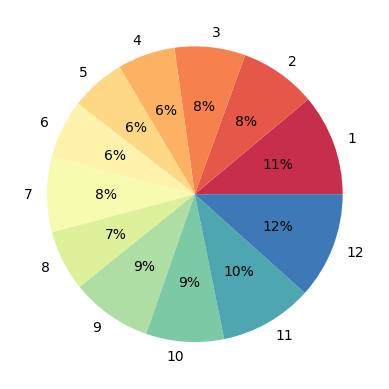

In [6]:
month_cnt = np.array(metadata_df[["month", "sex"]].groupby("month").count()).reshape(-1)
palette_color = sns.color_palette("Spectral", 12)
plt.pie(month_cnt/ np.sum(month_cnt), labels=range(1,13), autopct='%.0f%%', colors=palette_color)
plt.show()


## Seasonal distribution

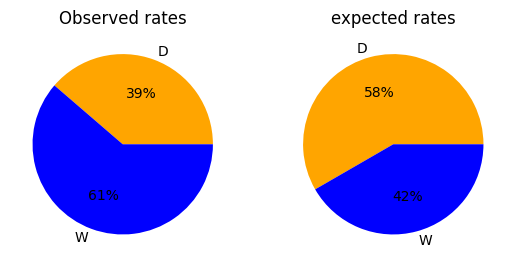

In [11]:
season_cnt = np.array(metadata_df[["month", "season"]].groupby("season").count()).reshape(-1)
fig,ax  = plt.subplots(ncols=2)
ax1 = ax[0]
ax1.pie(season_cnt/ np.sum(season_cnt), labels=["D", "W"], autopct='%.0f%%', colors = ["orange","blue"])
ax1.set_title("Observed rates")

plt.pie([7/12, 5/12], labels=["D", "W"], autopct='%.0f%%', colors = ["orange","blue"])
plt.title("expected rates")
plt.show()

# How many samples per babboon?

In [ ]:
baboons = metadata_df.groupby("baboon_id").count()["collection_date"]

In [ ]:
print(f"we have {len(baboons)} baboons in the train data")
print(f"{baboons.mean()} samples per baboon on average")

we have 80 baboons in the train data
76.2 samples per baboon on average


Text(0, 0.5, 'number of baboons')

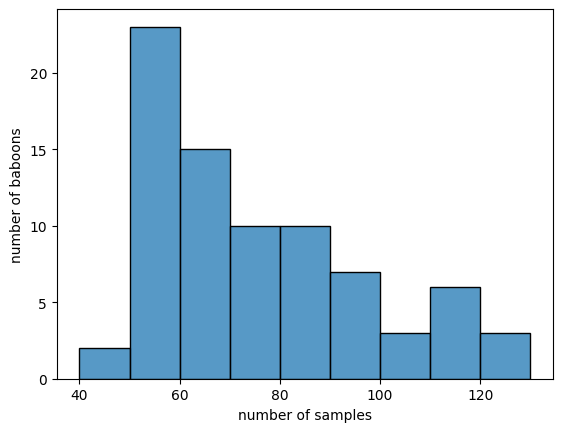

In [ ]:
sns.histplot(baboons, binwidth=10, binrange=(40, 130))
plt.xlabel("number of samples")
plt.ylabel("number of baboons")

Time variance between to consecutive samples

In [ ]:
metadata_df["collection_date"] = (pd.to_datetime(metadata_df['collection_date']) - pd.Timestamp('1970-01-01')).dt.days

In [ ]:
ls = []
for baboon in metadata_df["baboon_id"].unique():
    curr = metadata_df[metadata_df["baboon_id"] == baboon]["collection_date"].values
    ls.append(np.nan)
    for i in range(len(curr)-1):
        ls.append(curr[i+1]-curr[i])

In [ ]:
metadata_df["time_diff"] = ls

In [ ]:
metadata_df[metadata_df["baboon_id"] == "Baboon_107"].to_csv("babb.csv")